In [1]:
import functools

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm, LinearSegmentedColormap
from matplotlib.widgets import Button

from PIL import Image

In [2]:
from src.hadamard import HadamardMatrix
from src.utils import is_power_of_two

In [4]:
def transform(F, H=None, func=None):
    assert F.shape[0] == F.shape[1]
    assert is_power_of_two(F.shape[0])

    if H is None:
        H = HadamardMatrix(order=F.shape[0])
    
    if func is None:
        func = lambda x: x
    
    S1 = H.forward(F)
    S2 = func(S1.copy())
    
    # R = np.uint8(H.inverse(S2))
    R = H.inverse(S2)

    return H, F, S1, R, S2

In [ ]:
def fwht(f, inverse=False):
    a = f.copy()
    n = a.shape[0]
    if n < 2:
        return a

    assert is_power_of_two(n)

    h = 2
    while h <= n:
        hf = h // 2
        for i in range(0, n, h):
            for j in range(hf):
                u, v = a[i + j], a[i + j + hf]
                a[i + j], a[i + j + hf] = u + v, u - v
        h *= 2

    if inverse:
        a = [x/n for x in a]

    return a

In [ ]:
def fast_transform(F, func=None):
    assert F.shape[0] == F.shape[1]
    assert is_power_of_two(F.shape[0])

    if func is None:
        func = lambda x: x


In [5]:
FIGSIZE = 12
DPI = 100

def show(args, title):
    H, F, S1, R, S2 = args

    cmap=LinearSegmentedColormap.from_list('rwb', ['r', 'w', 'b'], N=512)
    norm = SymLogNorm(vmin=-10.0, vmax=10.0, linthresh=1.0, linscale=0.1)  # type: ignore

    fig = plt.figure(figsize=(FIGSIZE, FIGSIZE), dpi=DPI)  
    axs = fig.subplots(ncols=2, nrows=2)
    fig.suptitle(title, fontsize=14)

    axs[0][0].imshow(F, cmap=plt.cm.gray)  # type: ignore
    plt.colorbar(axs[0][1].matshow(S1, cmap=cmap, norm=norm))  # type: ignore

    axs[1][0].imshow(R, cmap=plt.cm.gray)  # type: ignore
    plt.colorbar(axs[1][1].matshow(S2, cmap=cmap, norm=norm))  # type: ignore

    # axs[2][0].matshow(H.data)  # type: ignore
   

In [6]:
def show_example(example_set, idx=0):
    kwargs = example_set[idx]
    title = kwargs.pop('title', 'No Title')
    return show(transform(**kwargs), title)

In [7]:
img = np.array(Image.open('./resources/penta1024.tiff'))
lena = np.array(Image.open('./resources/lena_gray.bmp'))


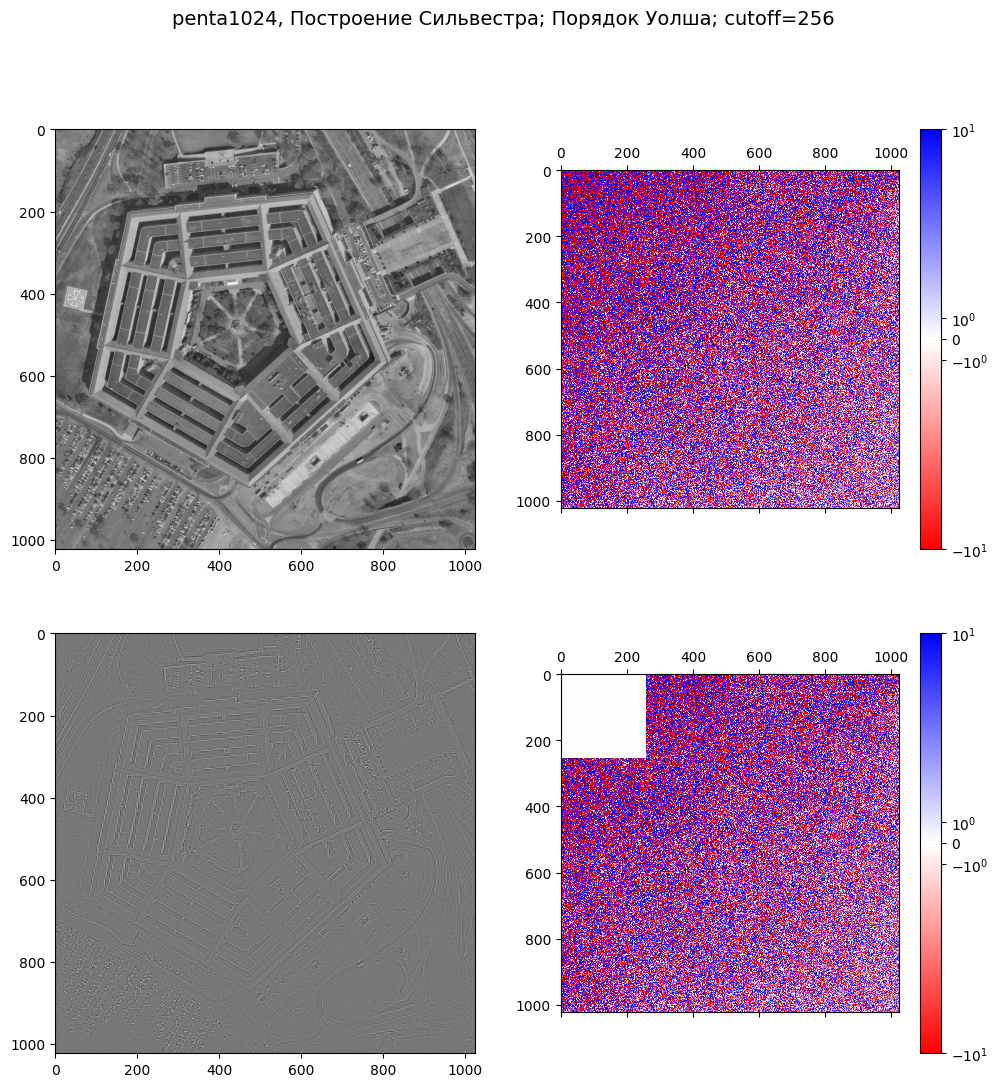

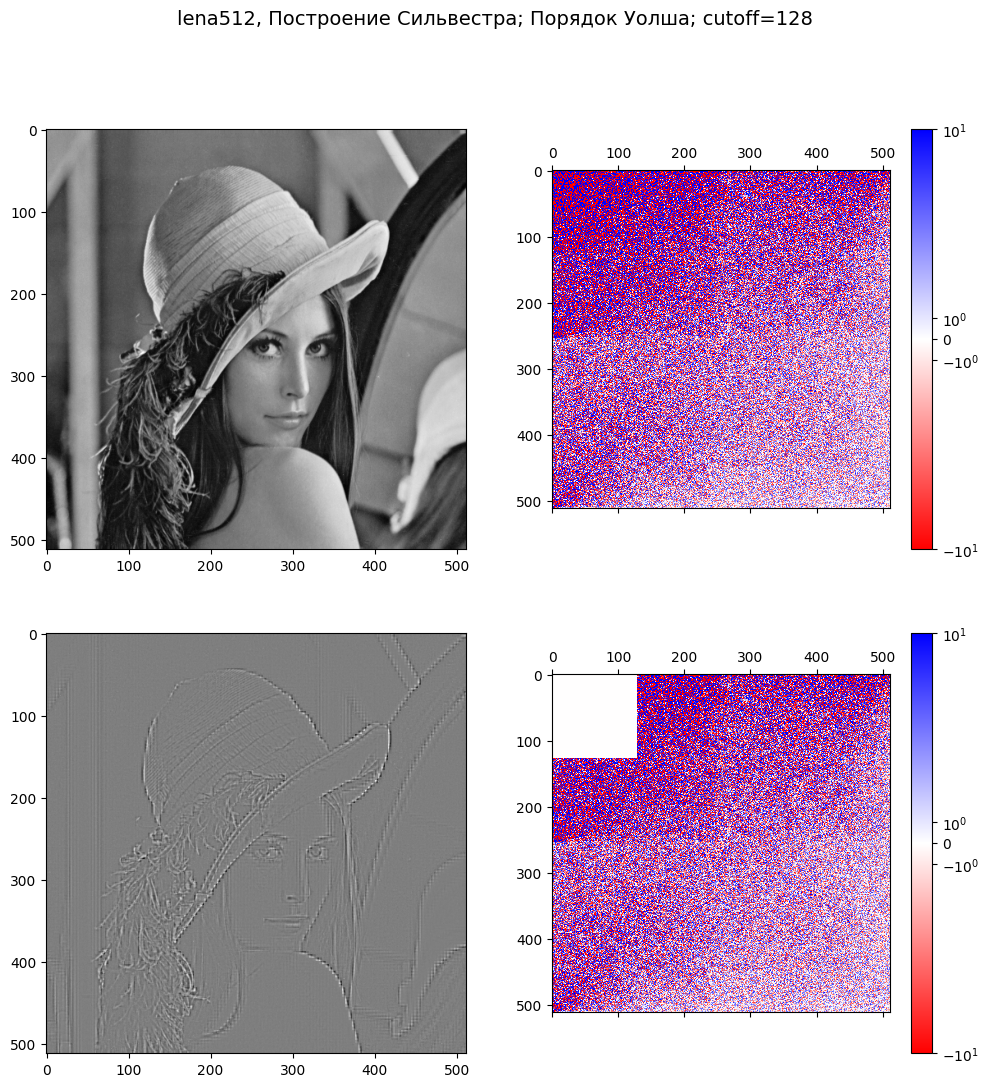

In [8]:
examples_1 = [
    {
        'F': img,
        'H': HadamardMatrix(
            order=img.shape[0],
            strategy=HadamardMatrix.GenStrategy.sylvester,
            ordering=HadamardMatrix.Ordering.walsh,
        ),
        'func': functools.partial(low_freq_filter, cutoff=256, triangle=False),
        'title': f'penta1024, Построение Сильвестра; Порядок Уолша; cutoff={256}',
    },
    {
        'F': lena,
        'H': HadamardMatrix(
            order=lena.shape[0],
            strategy=HadamardMatrix.GenStrategy.sylvester,
            ordering=HadamardMatrix.Ordering.walsh,
        ),
        'func': functools.partial(low_freq_filter, cutoff=128, triangle=False),
        'title': f'lena512, Построение Сильвестра; Порядок Уолша; cutoff={128}',
    }
]
for idx in range(len(examples_1)):
    show_example(example_set=examples_1, idx=idx)